
# **Income Predictions: A Census Snapshot**

### Team 4: Alima Abdirova, Gunjan Sharma, Oumou Barry, Raiymbek Ordabayev

Link to the Colab Notebook: https://colab.research.google.com/drive/1ZWZtRzKUGgH236VqpcKboYUOQ1jLzBpT?usp=sharing

Table of Contents

I. Dataset and Introduction

II. Data Wrangling and Exploration

A. Data Exploration

B. Data Cleaning

III. Exploratory Data Analysis

IV. Data Prepocessing  

V. Modeling

a. Managing imbalanced data

b. Feature Selection

c. Model Selection with Hyperparameter Tuning

A. Random Forest  

B. KNN

C. Logistics Regression

D. SVM

d. Ensemble Model

i. Voting

ii. Stacking

e. Metrics and Visualizations
            
i. Confusion Matrix
        
ii. ROC Curve

iii. Precision-Recall Curve

VI. Feature Importance

VII. Challenges

VIII. Conclusion

IX. References

# I. Dataset and Introduction

##Data Dictionary:
1. **Age:** Integer (int64) - Represents the age of the individual.
2. **Workclass:** Categorical (object) - Describes the type of employment.
3. **Fnlwgt:** Integer (int64) - Stands for final weight; this is the number of units in the target population that the responding unit represents.
4. **Education:** Categorical (object) - Indicates the highest level of education completed.
5. **num:** Integer (int64) - Represents the numerical education level.
6. **Marital status:** Categorical (object) - Describes the marital status of the individual.
7. **Occupation:** Categorical (object) - Represents the type of occupation.
8. **Relationship:** Categorical (object) - Indicates the relationship status.
9. **Race:** Categorical (object) - Specifies the race of the individual.
10. **Sex:** Categorical (object) - Indicates the gender of the individual.
11. **Capital. gain:** Integer (int64) - Represents capital gains for the individual.
12. **Capital. loss:** Integer (int64) - Represents capital losses for the individual.
13. **Hours.per.week:** Integer (int64) - Indicates the number of working hours per week.
14. **Native. country:** Categorical (object) - Specifies the native country of the individual.
15. **Income:** Categorical (object) - Target variable indicating whether the individual earns more than $50K per year (>50K) or not (<=50K).

## Introduction:
In an era where the job market is constantly changing, it's crucial to comprehend how demographic and occupational factors impact an individual's earning potential. This study focuses on using machine learning methodologies to forecast if a person's annual income is likely to exceed or fall short of $50,000. This prediction takes into account a range of demographic attributes, including age, level of education, and marital status, as well as occupational aspects such as the nature of the job, the industry it belongs to, and the individual's employment status. This approach seeks to provide insightful correlations and predictive models that can be used in various socio-economic analyses and policy-making decisions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import drive
import seaborn as sns
import statsmodels.formula.api as smf
#drive.mount('/content/drive')
#data_folder = '/content/drive/MyDrive/Machine_learning'

In [ ]:
#data_folder = '/content/drive/MyDrive/ML/adult.csv'

In [ ]:
data = pd.read_csv('adult.csv')

Mount Google Drive to access files from Colab.

# II. Data Wrangling and Exploration

## A. Data Exploration

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

Extract unique values from the 'income' column of the 'data' DataFrame.


In [ ]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
num_rows, num_columns = data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 32561
Number of columns: 15


In [ ]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## B. Data Cleaning

In [ ]:
data_na = data.replace("?", pd.NA)
mask = data_na.isna().any(axis=1)
data= data[~mask]

Replace '?' with NA in DataFrame 'data', create a mask for rows with any NAs, and retain rows without NAs.

In [ ]:
question_marks_exist = any(data.applymap(lambda x: "?" in str(x)).values.flatten())
question_marks_exist

False

To verify if '?' exists in any cell of the DataFrame; result is False, indicating no '?' found.


In [ ]:
data.columns = [col.replace('.', '_') for col in data.columns]
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Rename columns in 'data' by replacing '.' with '_' in each column name.


In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


There are zero missing values in all columns of 'data', indicating no missing data.


In [ ]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education_num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital_gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital_loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours_per_week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


Correlation matrix shows no strong correlations among variables; highest is between education_num and hours_per_week (0.15252).

In [ ]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


# III. Exploratory Data Analysis

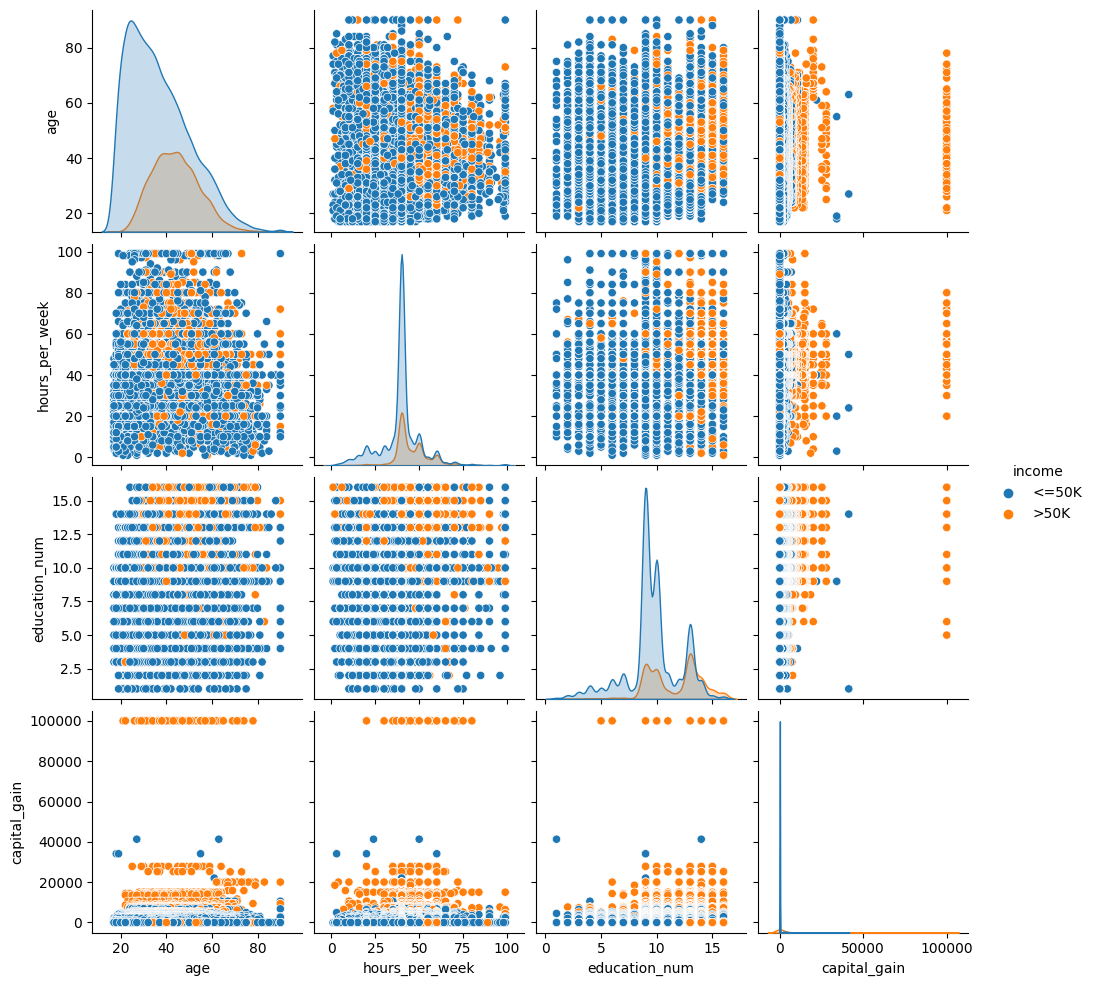

In [ ]:
sns.pairplot(data, vars=['age', 'hours_per_week', 'education_num', 'capital_gain'], hue='income')
plt.show()

The pairplot indicates potential correlations between 'education_num', 'capital_gain', and 'income', with distinct clusters for income levels. The distribution of 'age' and 'hours_per_week' shows a wide spread across income categories, suggesting a less pronounced direct correlation with income.


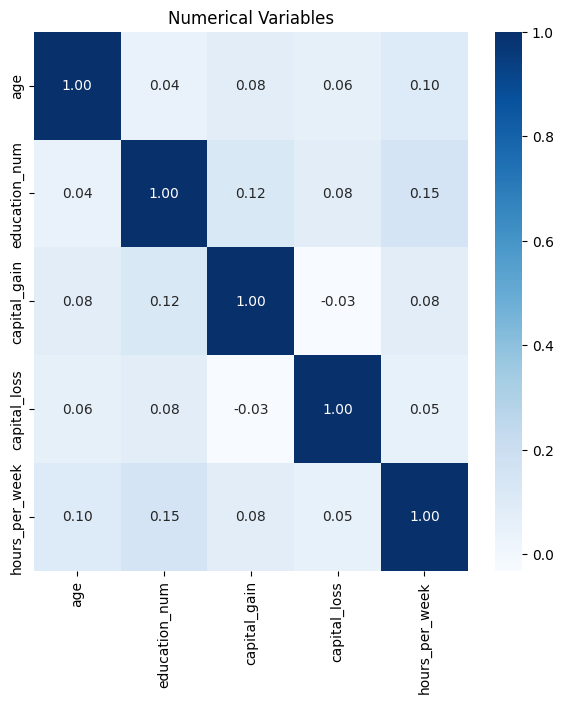

In [ ]:
plt.figure(figsize=(7, 7 ))
sns.heatmap(data[['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Numerical Variables')
plt.show()

Correlation matrix of numerical variables 'age', 'education_num', 'capital_gain', 'capital_loss', and 'hours_per_week'. Darker colors indicate stronger positive correlations, as seen between 'education_num' and 'hours_per_week'.


In [ ]:
import plotly.express as px
import pandas as pd

# Assuming 'data' is your DataFrame and 'income' is the column of interest.
# You would first calculate the value counts normalized to get the percentage.
income_distribution = data['income'].value_counts(normalize=True).reset_index()
income_distribution.columns = ['income', 'percentage']

# Now, create the bar graph with Plotly Express
fig = px.bar(income_distribution, x='income', y='percentage', title='Income Distribution')
fig.update_layout(xaxis_title='Income', yaxis_title='Percentage')

# Update additional layout settings
fig.update_layout(
    title=dict(
        text='Income Distribution',
        y=0.90,
        x=0.5,
        xanchor='center',
        yanchor='top',
        font=dict(
            size=20
        )
    ),
    font=dict(
        family="Arial, Helvetica, sans-serif",
        size=12,
        color="Purple"
    ),
    autosize=False,
    width=700,
    height=600
)

# Show the graph
fig.show()


The "Income Distribution" graph depicts an uneven distribution across two income levels in the dataset, with a significant majority earning less than or equal to $50,000, and a much smaller segment earning more. This skewness indicates that lower incomes are more prevalent among the individuals in this dataset.

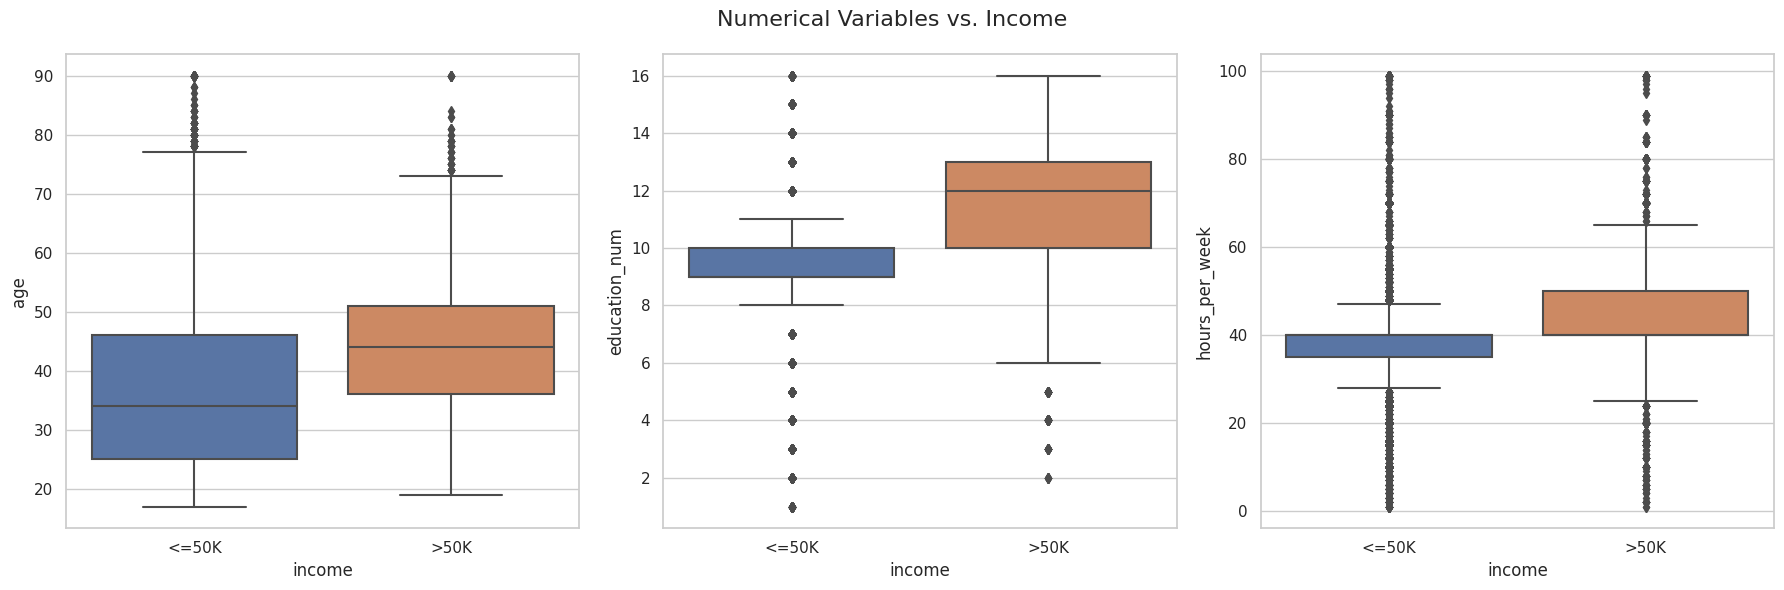

In [ ]:
sns.set(style="whitegrid")

#  Numerical Variables vs. Income
numerical_cols_analysis = ['age', 'education_num', 'hours_per_week']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
fig.suptitle('Numerical Variables vs. Income', fontsize=16)

for i, col in enumerate(numerical_cols_analysis):
    sns.boxplot(x='income', y=col, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

**Age vs. Income**: The first box plot on the left shows the age distribution for the two income categories. For the "<=50K" income group, the age distribution is lower compared to the ">50K" group, suggesting that higher earners are generally older.

**Education vs. Income:** The middle box plot displays the number of years of education against the two income groups. It appears that individuals with more years of education tend to be in the ">50K" income category, indicating a positive relationship between the level of education and income.

**Hours per Week vs. Income:** The last box plot on the right compares the number of hours worked per week with income. The data suggests that individuals who work more hours per week are more likely to be in the higher income category of ">50K".

In [ ]:

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Specify the categorical columns to visualize
selected_categorical_columns = ['age', 'education_num']

# Create a combined bar chart for each selected categorical variable using Plotly Express
for column in selected_categorical_columns:
    # Create a DataFrame for the count data
    count_data = data.groupby([column, 'income']).size().reset_index(name='count')

    # Create a bar chart using Plotly Express
    fig = px.bar(count_data, x=column, y='count', color='income', barmode='group',
                 labels={'count': 'Count', 'income': 'Income', column: column.capitalize()},
                 title=f'Count Plot for {column.capitalize()}')

    # Rotate x-axis ticks vertically
    fig.update_xaxes(tickangle=0)

    # Show the plot
    fig.show()

**Age vs. Income**: From the graph, it's clear that the majority of individuals in most age groups fall into the lower income bracket (<= $50K). The counts for this income bracket are higher across the age spectrum, with a peak at around age 23 where the count is highest. The counts then gradually decrease as age increases.

The count for individuals earning more than $50K is significantly lower at all ages, and this count also decreases as age increases, but it starts at a much lower point. The count for the higher income bracket is less than the lower income bracket in every age group shown.

 **Education vs. Income**: The chart displays the number of years of education against the two income groups. It appears that individuals with more years of education tend to be in the ">50K" income category, indicating a positive relationship between the level of education and income.

<ipython-input-43-8637074d5775>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='capital_gain', data=data, ci=None, color='skyblue', alpha=0.7, label='Capital Gain')
<ipython-input-43-8637074d5775>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='income', y='capital_loss', data=data, ci=None, color='salmon', alpha=0.7, label='Capital Loss', hatch='/')


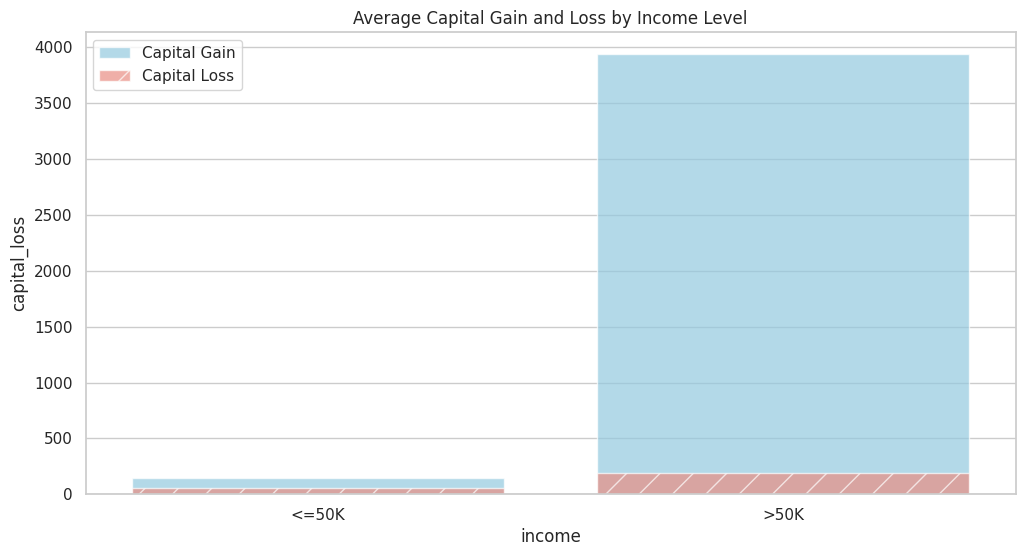

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot separate bars for capital gain and capital loss by income level
plt.figure(figsize=(6, 6))
sns.barplot(x='income', y='capital_gain', data=data, ci=None, color='skyblue', alpha=0.7, label='Capital Gain')
sns.barplot(x='income', y='capital_loss', data=data, ci=None, color='salmon', alpha=0.7, label='Capital Loss', hatch='/')

plt.title('Average Capital Gain and Loss by Income Level')
plt.legend()
plt.show()

The chart compares the average capital gain and loss for two income groups: "<=50K" and ">50K". The blue bars represent capital gains and the red bars represent capital losses. For the "<=50K" income group, both the capital gain and loss are very minimal, almost negligible when compared to the ">50K" group. On the other hand, for the ">50K" income group, the capital gain is substantially higher, as indicated by the tall blue bar that reaches close to 4000. The capital loss for the ">50K" group is also present but much smaller than the gain, suggesting that individuals in this income bracket, on average, experience more significant capital gains than losses.

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Specify the categorical columns to visualize
selected_categorical_columns = ['workclass', 'education', 'occupation']

# Create a combined bar chart for each selected categorical variable using Plotly Express
for column in selected_categorical_columns:
    # Create a DataFrame for the count data
    count_data = data.groupby([column, 'income']).size().reset_index(name='count')

    # Create a bar chart using Plotly Express
    fig = px.bar(count_data, x=column, y='count', color='income', barmode='group',
                 labels={'count': 'Count', 'income': 'Income', column: column.capitalize()},
                 title=f'Count Plot for {column.capitalize()}')

    # Rotate x-axis ticks vertically
    fig.update_xaxes(tickangle=90)

    # Show the plot
    fig.show()

**Workclass vs. Income:** The first chart shows the distribution of individuals across different work classes, such as federal government, local government, private sector, self-employed, and without pay, among others. The private sector has the highest count of individuals in both income groups, while the "Without pay" and "Never-worked" categories have the lowest counts. There appears to be a larger proportion of individuals in the private sector in the "<=50K" income group compared to the ">50K" group.

**Education vs. Income:** The second chart details the educational attainment of individuals, ranging from preschool to doctoral degrees. Here, the most significant counts are for high school graduates and those with some college education, with high school graduates being the most common in the "<=50K" income group and those with a bachelor's degree being more common in the ">50K" income group.

**Occupation vs. Income:** The third chart categorizes individuals by occupation, including administrative, executive managerial, farming/fishing, tech support, sales, and more. The chart shows variation in the counts of people within different occupations across the two income groups. For example, there are higher counts of executive managerial and professional specialty occupations in the ">50K" income group, while occupations like handlers-cleaners, machine-op-inspct, and other-service are more common in the "<=50K" income group.

In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the relevant columns

# Set the style of seaborn
sns.set(style="whitegrid")

# Specify the categorical columns to visualize
selected_categorical_columns = ['marital_status', 'relationship', 'race', 'sex']

# Create a combined bar chart for each selected categorical variable using Plotly Express
for column in selected_categorical_columns:
    # Create a DataFrame for the count data
    count_data = data.groupby([column, 'income']).size().reset_index(name='count')

    # Create a bar chart using Plotly Express
    fig = px.bar(count_data, x=column, y='count', color='income', barmode='group',
                 labels={'count': 'Count', 'income': 'Income', column: column.capitalize()},
                 title=f'Count Plot for {column.capitalize()}')

    # Rotate x-axis ticks vertically
    fig.update_xaxes(tickangle=90)

    # Show the plot
    fig.show()


**Marital Status vs. Income:** This chart shows various marital statuses, such as divorced, married-civ-spouse, married-AF-spouse, married-spouse-absent, never-married, separated, and widowed. In almost all categories, there are more individuals with an income of "<=50K" than those with ">50K". The married-civ-spouse category has the highest count, especially for those earning ">50K", which suggests that being married to a civilian spouse is correlated with a higher income bracket.

**Relationship vs. Income:** The second chart categorizes individuals by their relationship to the household, like husband, not-in-family, other-relative, own-child, unmarried, and wife. Similar to the first chart, the counts for the "<=50K" income group are generally higher across all relationships. Notably, the "Husband" and "Not-in-family" categories have a large number of individuals in the "<=50K" category, but the "Husband" role also has a significant count in the ">50K" income bracket.

**Race vs. Income**: The chart categorizes individuals by race: Amer-Indian-Eskimo, Asian-Pac-Islander, Black, Other, and White. For every racial group, the number of individuals earning "<=50K" is higher than those earning ">50K". The White category has the highest counts in both income groups, but the disparity between the two income levels is significant across all races.

**Sex vs. Income:** This chart compares the counts of females and males within the same income categories. Again, for both sexes, the counts for "<=50K" are higher than those for ">50K". The chart shows a larger number of males than females in both income categories, but particularly so in the ">50K" income level.

In [ ]:
import plotly.express as px

# Select the top N countries to display
top_countries = data['native_country'].value_counts().nlargest(10).index
# Create a new column for plotting without modifying the original DataFrame
data['native_country_grouped'] = data['native_country'].replace(
    dict.fromkeys(data['native_country'].value_counts().index.difference(top_countries), 'Other')
)


country_income_group = data.groupby(['native_country_grouped', 'income']).size().reset_index(name='count')


# Create the bar chart using Plotly Express
fig = px.bar(
    country_income_group,
    x='native_country_grouped',
    y='count',
    color='income',  # Color by income level
    title='Count of individuals by Native Country and Income Level',
    labels={'count':'Number of Individuals', 'native_country_grouped':'Native Country'}
)

# Customize the layout
fig.update_layout(
    xaxis_title='Native Country',
    yaxis_title='Number of Individuals',
    xaxis_tickangle=-45,  # Rotate x-axis ticks to prevent overlap
    margin=dict(b=100)    # Increase bottom margin to accommodate labels
)

# Update the x-axis tick font size if needed
fig.update_xaxes(tickfont=dict(size=10))

# Show the figure
fig.show()

The bar chart depicts the count of individuals from various native countries categorized by two income levels: "<=50K" and ">50K". The countries listed include Canada, Cuba, El Salvador, England, Germany, India, Mexico, Philippines, Puerto Rico, and the United States, as well as a category labeled "Other".
The United States has an overwhelmingly larger count of individuals in both income categories compared to the other countries, with the number of individuals earning "<=50K" being significantly higher than those earning ">50K". All other countries have much smaller counts, and in each of these, the "<=50K" group outnumbers the ">50K" group, with "Other" having the least count among the listed options.
This visualization indicates that the dataset contains a large number of individuals from the United States, most of whom fall under the lower income category.

# IV. Data Prepocessing

In [ ]:
#code classes as 0 and 1 for better interpretation
data['income'] = data['income'].map({'>50K': 1, '<=50K': 0})


In [ ]:
data['income']

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30162, dtype: int64

We decided to map the income levels to 0 and 1 dummies to make our interpretation and computation of metrics easier as most algorithms recognize that format.

In [ ]:
#drop some features
data.drop('native_country', axis=1, inplace=True)

In [ ]:
data.drop('native_country_grouped', axis=1, inplace=True

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  income          30162 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 3.5+ MB


We decided to drop the native country column as it contains too many unique values. This will make it meaningless as each country will become a new column once one hot encoded leaving us with an unreasonable amount of features. We also dropped the native_country_grouped column that we created for one of our visualizations in the EDA above.

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
X = data.drop('income', axis=1)
y = data['income'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42) #split all

In [ ]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week
19841,35,Private,61343,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45
24329,50,Federal-gov,306707,HS-grad,9,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,12
10002,43,Self-emp-not-inc,271665,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,45
25682,23,Private,481175,Some-college,10,Never-married,Exec-managerial,Own-child,Other,Male,0,0,24
13800,30,Private,287986,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40


Our next step was to perform an 80/20 split of our dataset before modeling.

In [ ]:
#Data Preprocessing pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector


from sklearn import set_config
set_config(display='diagram') # shows the pipeline graphically when printed

#scale numeric variables and impute missing values we did not catch
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

#one hot encode categorical variables and impute missing values we did not catch
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat_encoder', OneHotEncoder(drop='first',handle_unknown='ignore'))
    ])

#initialize the transformer
prep_pipeline = ColumnTransformer([
    ('num', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat', cat_pipeline, make_column_selector(dtype_include=object))
])

prep_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6c93750340>),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6c92ccfac0>)])

We then created our formal preprocessing pipeline. We perform one hot encoding on the categorical variables and we scale the numeric features. Although we have handled missing values above, we included imputers as safeguards to catch some things that we might have missed.

At this step, we realized that would have around 63 features after one hot encoding our categorical features. We believed that this was unreasonable so we decided to carry out feature selection. We first measured the cross validated accuracy of a simple logit model for later comparison.Then we performed feature selection using three methods: recursive, forward, and backward feature selection.

# V. Modeling

##a: Managing imbalanced data

In [ ]:
#Check for class imbalance #there is imbalance maybe use stratify=True in train test split? and use class_weight=balanced ?

class_distribution = data['income'].value_counts(normalize=True)

# show class distribution
print("Class Distribution:")
print(class_distribution)

# Calculate imbalance ratio
imbalance_ratio = class_distribution[1] / class_distribution[0]

print(f"\nImbalance Ratio: {imbalance_ratio:.2f}")


Class Distribution:
income
<=50K    0.751078
>50K     0.248922
Name: proportion, dtype: float64

Imbalance Ratio: 0.33


In the previous block, we are checking if our classes are imbalanced. We have 75% of our labels are under or equal to 50k and the remaining 25% is above the 50k income level. This is not very concerning so we won't take additional actions but may choose to use balanced accuracy as a safeguard moving forward.

##b: Feature selection

In [ ]:
# Let's measure the cross validation error of a logistic regression model, for comparison after feature selection
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

log_reg = make_pipeline(prep_pipeline, LogisticRegression(max_iter=500))

# Use 'accuracy' as the evaluation metric
logreg_cv_accuracy = cross_val_score(log_reg, X_train, y_train, scoring="accuracy", cv=5)
print('Cross-validation accuracy: {:.2f}'.format(logreg_cv_accuracy.mean()))

Cross-validation accuracy: 0.85


Optimal number of features: 46
Selected features: ['num__age' 'num__education_num' 'num__capital_gain' 'num__capital_loss'
 'num__hours_per_week' 'cat__workclass_Local-gov' 'cat__workclass_Private'
 'cat__workclass_Self-emp-inc' 'cat__workclass_Self-emp-not-inc'
 'cat__workclass_State-gov' 'cat__workclass_Without-pay'
 'cat__education_11th' 'cat__education_12th' 'cat__education_1st-4th'
 'cat__education_5th-6th' 'cat__education_9th' 'cat__education_Assoc-acdm'
 'cat__education_Doctorate' 'cat__education_Preschool'
 'cat__education_Prof-school' 'cat__education_Some-college'
 'cat__marital_status_Married-AF-spouse'
 'cat__marital_status_Married-civ-spouse'
 'cat__marital_status_Married-spouse-absent'
 'cat__marital_status_Never-married' 'cat__marital_status_Separated'
 'cat__marital_status_Widowed' 'cat__occupation_Armed-Forces'
 'cat__occupation_Craft-repair' 'cat__occupation_Exec-managerial'
 'cat__occupation_Farming-fishing' 'cat__occupation_Handlers-cleaners'
 'cat__occupation_Machin

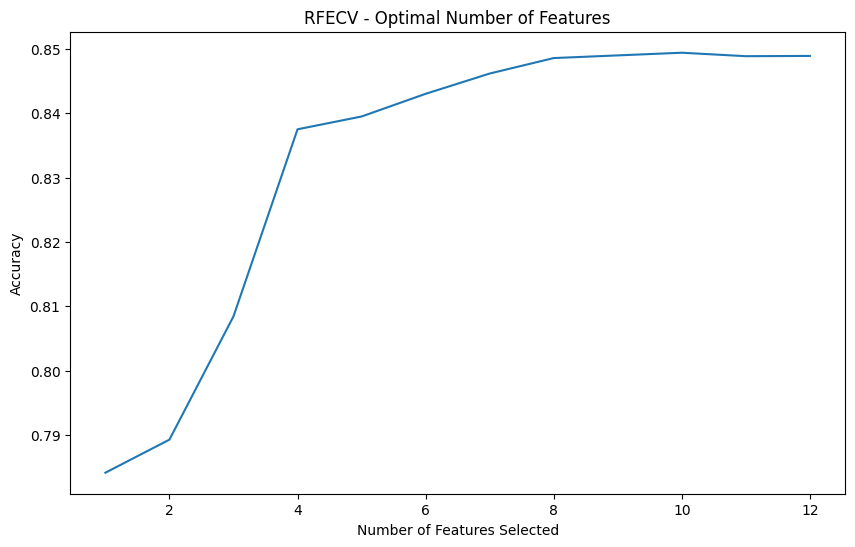

In [ ]:
########## Feature selection using recursive feature selection #############

import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#initialize a recursive feature selector with a simple logit model
rfecv = RFECV(LogisticRegression(max_iter=500), scoring='accuracy', step=5)

#prepare the feature selection pipeline
rfecv_pipe = Pipeline([
    ('prep', prep_pipeline),
    ('select', rfecv),
])

#fit the training data to the selector
rfecv_pipe.fit(X_train, y_train)

#visualize the accuracy against the number of features
plt.figure(figsize=(10, 6))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of Features Selected")
plt.ylabel("Accuracy")
mean_score = rfecv.cv_results_['mean_test_score']
plt.plot(range(1, len(mean_score) + 1), mean_score)

#print the optimal number of features, the selected features and the accuracy with the selected features
optimal_num_features = rfecv.n_features_
optimal_accuracy = max(rfecv.cv_results_['mean_test_score'][:optimal_num_features])
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected features: {rfecv_pipe['prep'].get_feature_names_out()[rfecv.support_]}")
print(f"Accuracy at optimal number of features: {optimal_accuracy}")
plt.show()


The recursive feature method selected 46 features. The accuracy at optimal number of features was about 85% which is comparable to our simple logit model fitting all 63 original features.


Optimal number of features: 33
feature combination (0, 1, 2, 3, 4, 5, 8, 9, 11, 14, 15, 16, 18, 19, 21, 24, 25, 27, 28, 29, 31, 33, 34, 35, 36, 40, 41, 42, 43, 44, 47, 51, 52) gave best accuracy of -0.85.



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.7919602154993783, 0.7932034811438043, 0.789...",0.791952,"(3,)",0.001945,0.001513,0.000757
2,"(3, 4)","[0.8122668876916701, 0.8052217157065893, 0.800...",0.803556,"(3, 4)",0.006375,0.00496,0.00248
3,"(3, 4, 25)","[0.8162038955656858, 0.8099875673435557, 0.811...",0.809731,"(3, 4, 25)",0.005772,0.004491,0.002245
4,"(3, 4, 21, 25)","[0.8172399502693742, 0.8170327393286365, 0.812...",0.814373,"(3, 4, 21, 25)",0.004015,0.003124,0.001562
5,"(3, 4, 11, 21, 25)","[0.8172399502693742, 0.8172399502693742, 0.812...",0.814414,"(3, 4, 11, 21, 25)",0.004061,0.00316,0.00158
6,"(3, 4, 11, 21, 25, 33)","[0.8172399502693742, 0.8172399502693742, 0.812...",0.814414,"(3, 4, 11, 21, 25, 33)",0.004061,0.00316,0.00158
7,"(3, 4, 11, 21, 24, 25, 33)","[0.8172399502693742, 0.8172399502693742, 0.812...",0.814331,"(3, 4, 11, 21, 24, 25, 33)",0.004365,0.003396,0.001698
8,"(3, 4, 11, 21, 24, 25, 29, 33)","[0.8170327393286365, 0.8166183174471612, 0.813...",0.814373,"(3, 4, 11, 21, 24, 25, 29, 33)",0.003913,0.003045,0.001522
9,"(3, 4, 11, 21, 24, 25, 29, 33, 51)","[0.8176543721508496, 0.8164111065064236, 0.813...",0.814414,"(3, 4, 11, 21, 24, 25, 29, 33, 51)",0.004123,0.003208,0.001604
10,"(3, 4, 11, 14, 21, 24, 25, 29, 33, 51)","[0.8168255283878989, 0.8164111065064236, 0.813...",0.814331,"(3, 4, 11, 14, 21, 24, 25, 29, 33, 51)",0.00394,0.003066,0.001533


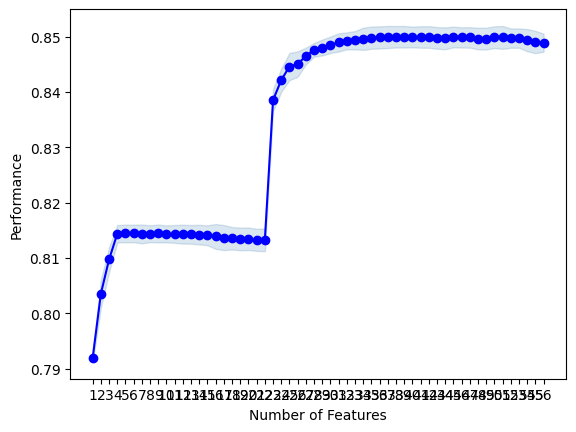

In [ ]:
########## Feature selection using sequential feature selection #############

from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#initialize a forward feature selector with a simple logit model
sfs = SequentialFeatureSelector(LogisticRegression(max_iter=500), k_features="parsimonious", scoring='accuracy',n_jobs=-1)

#prepare the feature selection pipeline
preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', sfs),
])


#fit the training data to the selector
processed_X = preprocess_pipeline.fit_transform(X_train, y_train)

# Get the optimal number of features
optimal_num_features = len(sfs.k_feature_idx_)
print(f'Optimal number of features: {optimal_num_features}')

# Get optimal feature combination and the corresponding accuracy
print(f'feature combination {sfs.k_feature_idx_} gave best accuracy of {-sfs.k_score_:.2f}.\n')

#show each feature combination explored by the algorithm and the corresponding metrics
display(pd.DataFrame.from_dict(sfs.get_metric_dict()).T)
plot_sfs(sfs.get_metric_dict(), kind='std_err');

In [ ]:
# Access the SequentialFeatureSelector from the pipeline
sfs_transformer = preprocess_pipeline.named_steps['select']

# Get the indices of the selected features from SequentialFeatureSelector
selected_feature_indices = sfs_transformer.k_feature_idx_

# Get the names of the one-hot encoded features
one_hot_encoded_feature_names = preprocess_pipeline['prep'].get_feature_names_out()

# Map the selected feature indices to the corresponding one-hot encoded feature names
selected_feature_names = [one_hot_encoded_feature_names[idx] for idx in selected_feature_indices]

# Print the selected feature names
print(f"Selected features: {selected_feature_names}")
len(selected_feature_names)

Selected features: ['num__age', 'num__fnlwgt', 'num__education_num', 'num__capital_gain', 'num__capital_loss', 'num__hours_per_week', 'cat__workclass_Self-emp-inc', 'cat__workclass_Self-emp-not-inc', 'cat__workclass_Without-pay', 'cat__education_1st-4th', 'cat__education_5th-6th', 'cat__education_7th-8th', 'cat__education_Assoc-acdm', 'cat__education_Assoc-voc', 'cat__education_Doctorate', 'cat__education_Preschool', 'cat__education_Prof-school', 'cat__marital_status_Married-AF-spouse', 'cat__marital_status_Married-civ-spouse', 'cat__marital_status_Married-spouse-absent', 'cat__marital_status_Separated', 'cat__occupation_Armed-Forces', 'cat__occupation_Craft-repair', 'cat__occupation_Exec-managerial', 'cat__occupation_Farming-fishing', 'cat__occupation_Priv-house-serv', 'cat__occupation_Prof-specialty', 'cat__occupation_Protective-serv', 'cat__occupation_Sales', 'cat__occupation_Tech-support', 'cat__relationship_Other-relative', 'cat__race_Asian-Pac-Islander', 'cat__race_Black']


33

The forward feature selection method had an output of 33 features. The accuracy at optimal number of features is still 85% which is also comparable to the accuracy of our simple logit model.

Optimal number of features (backward selection): 10
feature combination (0, 2, 3, 4, 5, 9, 28, 36, 38, 39) gave best accuracy of 1.



,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
56,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8516369664318276, 0.8450062163282221, 0.852...",0.848896,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004176,0.003249,0.001625
55,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8512225445503523, 0.8447990053874844, 0.855...",0.849393,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.005164,0.004018,0.002009
54,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8516369664318276, 0.8450062163282221, 0.855...",0.8496,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004986,0.003879,0.00194
53,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.852051388313303, 0.8452134272689598, 0.8555...",0.849807,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004994,0.003885,0.001943
52,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.852051388313303, 0.8454206382096975, 0.8555...",0.849849,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004932,0.003837,0.001918
51,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.852051388313303, 0.8454206382096975, 0.8555...",0.849807,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004988,0.003881,0.00194
50,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8518441773725652, 0.8454206382096975, 0.855...",0.849807,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004902,0.003814,0.001907
49,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.852051388313303, 0.8454206382096975, 0.8555...",0.849849,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004932,0.003837,0.001918
48,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.852051388313303, 0.8454206382096975, 0.8555...",0.849849,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004932,0.003837,0.001918
47,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8518441773725652, 0.8454206382096975, 0.855...",0.849807,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004902,0.003814,0.001907


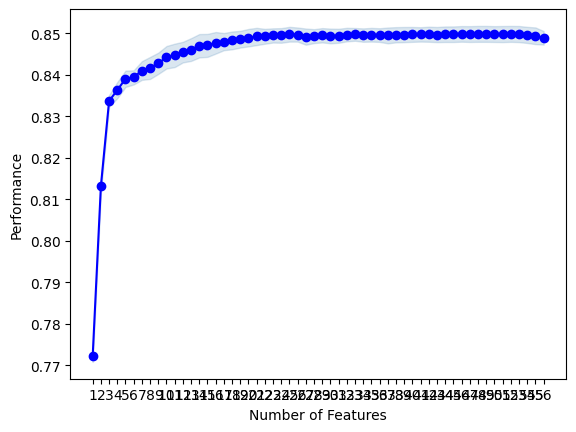

In [ ]:
#backward feature selection

#initialize a backward feature selector with a simple logit model
sbs = SequentialFeatureSelector(LogisticRegression(max_iter=500), forward=False,
                                k_features="parsimonious", scoring='accuracy',n_jobs=-1)

#prepare the feature selection pipeline
backward_preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', sbs),
])

#fit the training data to the selector
backward_preprocess_pipeline.fit(X_train, y_train)

# Get the optimal number of features
optimal_num_features_backward = len(sbs.k_feature_idx_)
print(f'Optimal number of features (backward selection): {optimal_num_features_backward}')

# Get optimal feature combination and the corresponding accuracy
print(f'feature combination {sbs.k_feature_idx_} gave best accuracy of {sbs.k_score_:.0f}.\n')

#show each feature combination explored by the algorithm and the corresponding metrics
display(pd.DataFrame.from_dict(sbs.get_metric_dict()).T)
plot_sfs(sbs.get_metric_dict(), kind='std_err');

The backward feature selection method had an output of 10 features. The accuracy at the optimal number of features is now 100% which is much higher than the accuracy of our simple logit model.However, an accuracy of 100% may indicate that overfitting is occuring. Additionally, dropping from 63 to 10 features is not reasonable.

After analyzing the results from the three methods, we decided to proceed with the 33 columns that were selected by the sequential forward feature selection. It has the same accuracy as the recursive method and contains a good amount of features compared to the backward feature selection.

In [ ]:
!pip install scikit-optimize

## c. Model Testing with Hyperparameter Tuning

After selecting features, we believed that we were now ready to start our modeling. Our approach was to implement 4 classifying models: a random forest, a k nearest neighbor classifier, a logistic regression model, and support vector machine. For each model we used the selected features and we tuned the hyperparameters to optimize the balanced accuracy.After that, we implemented a voting classifier and a stacking classifier to see if our models will predict better when they are ensembles.

###A. Random Forest

In [ ]:
############### Random Forest Classifier #########################

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import pandas as pd
from scipy.stats import randint
from skopt.space import Integer



# Define the sequential feature selector
sfs = SequentialFeatureSelector(LogisticRegression(max_iter=500), k_features="parsimonious", scoring='accuracy', n_jobs=-1)

# Create the full pipeline including feature selection
preprocess_pipeline = Pipeline([
    ('prep', prep_pipeline),
    ('select', sfs)
])

# Fit the pipeline to get the optimal features
processed_X_train = preprocess_pipeline.fit_transform(X_train, y_train)

# Get the optimal number of features
optimal_num_features = len(sfs.k_feature_idx_)
print(f'Optimal number of features: {optimal_num_features}')

# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 5, 20]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(processed_X_train, y_train)

# Hyperparameter tuning using Random Search
param_dist = {
    'max_depth': randint(low=3, high=10),
    'min_samples_leaf': randint(low=1,high=20)
    }

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, scoring='balanced_accuracy', cv=5, random_state=42)
random_search.fit(processed_X_train, y_train)



# Choose the best hyperparameters based on the highest cross-validated balanced accuracy on the training set
best_params_grid = grid_search.best_params_
best_params_random = random_search.best_params_
print(best_params_grid)
print(best_params_random)

# Evaluate the cross-validated balanced accuracy for each strategy
cv_balanced_acc_grid = grid_search.best_score_
cv_balanced_acc_random = random_search.best_score_

# Compare cross-validated results
print("CV Balanced Accuracy - Grid Search:", cv_balanced_acc_grid)
print("CV Balanced Accuracy - Random Search:", cv_balanced_acc_random)

# Choose the best set of hyperparameters based on the highest cross-validated balanced accuracy
best_params = best_params_grid if cv_balanced_acc_grid >= cv_balanced_acc_random else best_params_random


# Train the Final Model with Best Hyperparameters and Selected Features
final_model_rf = RandomForestClassifier(**best_params)
final_model_rf.fit(processed_X_train, y_train)

# Evaluate the Final Model on the Train Set
balanced_accuracy_train = balanced_accuracy_score(y_train, final_model_rf.predict(processed_X_train))
print(f'Balanced Accuracy on Train Set: {balanced_accuracy_train:.4f}')

# Evaluate the Final Model on the Test Set
processed_X_test = preprocess_pipeline.transform(X_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, final_model_rf.predict(processed_X_test))
print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test:.4f}')

Optimal number of features: 33
{'max_depth': 10, 'min_samples_leaf': 1}
{'max_depth': 9, 'min_samples_leaf': 15}
CV Balanced Accuracy - Grid Search: 0.7501041527140982
CV Balanced Accuracy - Random Search: 0.7418060096728621
Balanced Accuracy on Train Set: 0.7671
Balanced Accuracy on Test Set: 0.7502


The grid search returned the best parameters {'max_depth': 10, 'min_samples_leaf': 1} and had a balanced accuracy of 75.01%. When the random forest was fitted with optimal parameters, it achieved a balanced accuracy of 76.71% on the train set and 75.02% on the test set.

### B. KNN

In [ ]:
#KNN Model
!pip install scikit-optimize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import pandas as pd
from scipy.stats import randint
from skopt.space import Integer
import warnings
from sklearn.exceptions import ConvergenceWarning
from skopt.space import Categorical

# To suppress all convergence warnings
warnings.simplefilter('ignore', ConvergenceWarning)


# Hyperparameter tuning using Random Search
param_dist = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
random_search = RandomizedSearchCV(KNeighborsClassifier(), param_dist, n_iter=10, scoring='balanced_accuracy', cv=5, random_state=42)
random_search.fit(processed_X_train, y_train)

# Hyperparameter tuning using Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(processed_X_train, y_train)

# Choose the best hyperparameters based on the highest cross-validated balanced accuracy on the training set
best_params_grid = grid_search.best_params_
best_params_random = random_search.best_params_
print(best_params_grid)
print(best_params_random)

#Evaluate the cross-validated balanced accuracy for each strategy
cv_balanced_acc_grid = grid_search.best_score_
cv_balanced_acc_random = random_search.best_score_

# Compare cross-validated results
print("CV Balanced Accuracy - Grid Search:", cv_balanced_acc_grid)
print("CV Balanced Accuracy - Random Search:", cv_balanced_acc_random)

# Choose the best set of hyperparameters based on the highest cross-validated balanced accuracy
best_params = best_params_grid if cv_balanced_acc_grid >= cv_balanced_acc_random else best_params_random

# Train the Final Model with Best Hyperparameters and Selected Features
final_model_knn = KNeighborsClassifier(**best_params)
final_model_knn.fit(processed_X_train, y_train)

# Evaluate the Final Model on the Train Set
balanced_accuracy_train = balanced_accuracy_score(y_train, final_model_knn.predict(processed_X_train))
print(f'Balanced Accuracy on Train Set: {balanced_accuracy_train:.4f}')

# Evaluate the Final Model on the Test Set
processed_X_test = preprocess_pipeline.transform(X_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, final_model_knn.predict(processed_X_test))
print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test:.4f}')

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
CV Balanced Accuracy - Grid Search: 0.7591691121788887
CV Balanced Accuracy - Random Search: 0.7576490990963809
Balanced Accuracy on Train Set: 0.8087
Balanced Accuracy on Test Set: 0.7543


The grid search returned the best parameters {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'} and had a balanced accuracy of 75.92%. When the knn model was fitted with optimal parameters, it achieved a balanced accuracy of 80.87% on the train set and 75.43% on the test set.

###C. Logistic Regression

In [ ]:
################# Logistic Regression Model #####################
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import pandas as pd
from scipy.stats import randint
from scipy.stats import uniform
from skopt.space import Integer
import warnings
from sklearn.exceptions import ConvergenceWarning

# To suppress all convergence warnings
warnings.simplefilter('ignore', ConvergenceWarning)


# Hyperparameter tuning using Random Search
param_distributions = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100]
}
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions, n_iter=10, scoring='balanced_accuracy', cv=5, random_state=42)
random_search.fit(processed_X_train, y_train)

# Hyperparameter tuning using Grid Search
param_grid = {
    'C': np.logspace(-4, 4, 10),
    'penalty':['l1','l2'],
    'solver':['liblinear','saga'],
    'max_iter':[100]
}
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(processed_X_train, y_train)

# Choose the best hyperparameters based on the highest cross-validated balanced accuracy on the training set
best_params_grid = grid_search.best_params_
best_params_random = random_search.best_params_
print(best_params_grid)
print(best_params_random)

# Evaluate the cross-validated balanced accuracy for each strategy
cv_balanced_acc_grid = grid_search.best_score_
cv_balanced_acc_random = random_search.best_score_

# Compare cross-validated results
print("CV Balanced Accuracy - Grid Search:", cv_balanced_acc_grid)
print("CV Balanced Accuracy - Random Search:", cv_balanced_acc_random)

# Choose the best set of hyperparameters based on the highest cross-validated balanced accuracy
best_params = best_params_grid if cv_balanced_acc_grid >= cv_balanced_acc_random else best_params_random

# Train the Final Model with Best Hyperparameters and Selected Features
final_model_lr = LogisticRegression(**best_params)
final_model_lr.fit(processed_X_train, y_train)

# Evaluate the Final Model on the Train Set
balanced_accuracy_train = balanced_accuracy_score(y_train, final_model_lr.predict(processed_X_train))
print(f'Balanced Accuracy on Train Set: {balanced_accuracy_train:.4f}')

# Evaluate the Final Model on the Test Set
processed_X_test = preprocess_pipeline.transform(X_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, final_model_lr.predict(processed_X_test))
print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test:.4f}')

{'C': 2.782559402207126, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
{'C': 6.1111501174320875, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
CV Balanced Accuracy - Grid Search: 0.7664135566070959
CV Balanced Accuracy - Random Search: 0.7663860320592818
Balanced Accuracy on Train Set: 0.7662
Balanced Accuracy on Test Set: 0.7577


The grid search returned the best parameters {'C': 2.782559402207126, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'} and had a balanced accuracy of 76.64%. When the logit model was fitted with optimal parameters, it achieved a balanced accuracy of 76.62% on the train set and 75.77% on the test set.

###D. SVM

In [ ]:
################# SVM Model ###########################

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import pandas as pd
from scipy.stats import randint
from skopt.space import Integer
from sklearn.svm import SVC


# Hyperparameter tuning using Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, scoring='balanced_accuracy', cv=5)
grid_search.fit(processed_X_train, y_train)

# Hyperparameter tuning using Random Search
param_dist = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

random_search = RandomizedSearchCV(SVC(), param_dist, n_iter=10, scoring='balanced_accuracy', cv=5, random_state=42)
random_search.fit(processed_X_train, y_train)



# Choose the best hyperparameters based on the highest cross-validated balanced accuracy on the training set
best_params_grid = grid_search.best_params_
best_params_random = random_search.best_params_

print(best_params_grid)
print(best_params_random)


# Evaluate the cross-validated balanced accuracy for each strategy
cv_balanced_acc_grid = grid_search.best_score_
cv_balanced_acc_random = random_search.best_score_


# Compare cross-validated results
print("CV Balanced Accuracy - Grid Search:", cv_balanced_acc_grid)
print("CV Balanced Accuracy - Random Search:", cv_balanced_acc_random)


# Choose the best set of hyperparameters based on the highest cross-validated balanced accuracy
best_params = best_params_grid if cv_balanced_acc_grid >= cv_balanced_acc_random else best_params_random

# Train the Final Model with Best Hyperparameters and Selected Features
final_model_SVC = SVC(**best_params)
final_model_SVC.fit(processed_X_train, y_train)

# Evaluate the Final Model on the Train Set
balanced_accuracy_train = balanced_accuracy_score(y_train, final_model_SVC.predict(processed_X_train))
print(f'Balanced Accuracy on Train Set: {balanced_accuracy_train:.4f}')

# Evaluate the Final Model on the Test Set
processed_X_test = preprocess_pipeline.transform(X_test)
balanced_accuracy_test = balanced_accuracy_score(y_test, final_model_SVC.predict(processed_X_test))
print(f'Balanced Accuracy on Test Set: {balanced_accuracy_test:.4f}')

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
{'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
CV Balanced Accuracy - Grid Search: 0.762759551675486
CV Balanced Accuracy - Random Search: 0.762759551675486
Balanced Accuracy on Train Set: 0.7869
Balanced Accuracy on Test Set: 0.7537


The grid search and the random search had the same balanced accuracy and returned the best parameters{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}. They had a balanced accuracy of 76.28%. When the SVC model was fitted with optimal parameters from the grid search (per the logic of our if statement to select best parameters above), it achieved a balanced accuracy of 78.69% on the train set and 75.37% on the test set.

##d. Ensemble Model

####i. Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#Implement a voting classifier with the default hard voting

voting_clf = VotingClassifier(
    estimators=[
        ('lr', final_model_lr),
        ('rf', final_model_rf),
        ('svc', final_model_SVC),
        ('knn', final_model_knn)
    ])

#Fit the classifier
voting_clf.fit(processed_X_train,y_train)

for name, clf in voting_clf.named_estimators_.items():
    print(f'Accuracy of {name} is {clf.score(processed_X_test, y_test):.4f}')

print(f'Them voting give {voting_clf.score(processed_X_test, y_test):.4f}')

# Evaluate the Voting Classifier using balanced accuracy
balanced_accuracy_voting = cross_val_score(voting_clf, processed_X_test, y_test, scoring='balanced_accuracy', cv=5)

# Print the result
print(f'Balanced Accuracy of Voting Classifier: {balanced_accuracy_voting.mean():.4f}')

Accuracy of lr is 0.8417
Accuracy of rf is 0.8548
Accuracy of svc is 0.8444
Accuracy of knn is 0.8333
Them voting give 0.8487
Balanced Accuracy of Voting Classifier: 0.7394


The results show that our voting classifier performs better than most of our individual models (the logit, knn, and svc) as it achieves an accuracy of 84.87%. However our random forest seems to have a higher accuracy of 85.48%. When we look at balanced accuracy, it is 73.94% which is lower than the balanced accuracy on the test set achieved by some of our individual models above.

####ii. Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the base models
base_models = [
        ('lr', final_model_lr),
        ('rf', final_model_rf),
        ('svc', final_model_SVC),
        ('knn', final_model_knn)
    ]
# Initialize the Stacking Classifier with the base models and final estimator
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=RandomForestClassifier(random_state=42),
    cv=5
)

#Fit the ensemble model
stacking_clf.fit(processed_X_train, y_train)

# Evaluate the Stacking Classifier on the test data
accuracy = stacking_clf.score(processed_X_test, y_test)
print(f'Stacking the models has accuracy of {accuracy:.4f}')

# Evaluate the Voting Classifier using balanced accuracy
balanced_accuracy_voting = cross_val_score(stacking_clf, processed_X_test, y_test, scoring='balanced_accuracy', cv=5)

# Print the result
print(f'Balanced Accuracy of Stacking Classifier: {balanced_accuracy_voting.mean():.4f}')

Stacking the models has accuracy of 0.8483
Balanced Accuracy of Stacking Classifier: 0.7512


The results show that our stacking classifier performs better than some of our individual models (the logit, knn) as it achieves an accuracy of 84.83%. However our random forest and svc seems to have higher accuracies of 85.48% and 84.44%. When we look at balanced accuracy, it is 75.12% which is higher than the balanced accuracy on the test set achieved by the voting algorithm and the random forest.






Overall, the models ranked by order of balanced accuracy on the test set are in the following order: logit(75.77), knn(75.43), svc(75.37), stacking classifier(75.12), random forest(75.02), voting classifier(73.94).
In terms of accuracy, the models are ranked as follows:random forest (85.48),voting classifier(84.87), stacking classifier (84.83), svc(84.44), logit (84.17), knn (83.33).

Therefore the model with the higher balanced accuracy on the test set is the logit model and the model with the highest accuracy is the random forest.


Since the stacking classifier has a high accuracy, we decided to compute some metrics and visualizations with that model.

##e. Metrics and Visualizations

###i. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score

y_pred = stacking_clf.predict(processed_X_test)

# Set up the confusion matrix and the classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Function to print confusion matrix
def print_confusion_matrix(matrix):
    print("+-----------------+-----------------+")
    print(f"| True Negatives  | False Positives |")
    print(f"|     {matrix[0][0]:7.0f}    |     {matrix[0][1]:7.0f}     |")
    print("+-----------------+-----------------+")
    print(f"| False Negatives | True Positives  |")
    print(f"|     {matrix[1][0]:7.0f}    |     {matrix[1][1]:7.0f}     |")
    print("+-----------------+-----------------+\n")

# Function to print classification report
def print_classification_report(report):
    print("+-------------+-----------+--------+----------+---------+")
    print("|             | Precision | Recall | F1-Score | Support |")
    print("+-------------+-----------+--------+----------+---------+")
    for key, value in report.items():
        if key in ["accuracy", "macro avg", "weighted avg"]:
            continue
        precision = f"{value['precision']:.2f}"
        recall = f"{value['recall']:.2f}"
        f1_score = f"{value['f1-score']:.2f}"
        support = f"{value['support']:.0f}"
        print(f"| Class {key:<9} |    {precision}  |  {recall}  |   {f1_score}   |  {support} |")
    print("+-------------+-----------+--------+----------+---------+")
    accuracy = f"{report['accuracy']:.2f}"
    macro_avg = report['macro avg']
    weighted_avg = report['weighted avg']
    print(f"| Accuracy    |                    |   {accuracy}   |  {report['macro avg']['support']:.0f}  |")
    print(f"| Macro Avg   |    {macro_avg['precision']:.2f}  |  {macro_avg['recall']:.2f}  |   {macro_avg['f1-score']:.2f}   |         |")
    print(f"| Weighted Avg|    {weighted_avg['precision']:.2f}  |  {weighted_avg['recall']:.2f}  |   {weighted_avg['f1-score']:.2f}   |         |")
    print("+-------------+-----------+--------+----------+---------+\n")

# Print the results
print_confusion_matrix(conf_matrix)
print_classification_report(class_report)

+-----------------+-----------------+
| True Negatives  | False Positives |
|        4210    |         323     |
+-----------------+-----------------+
| False Negatives | True Positives  |
|         592    |         908     |
+-----------------+-----------------+

+-------------+-----------+--------+----------+---------+
|             | Precision | Recall | F1-Score | Support |
+-------------+-----------+--------+----------+---------+
| Class 0         |    0.88  |  0.93  |   0.90   |  4533 |
| Class 1         |    0.74  |  0.61  |   0.66   |  1500 |
+-------------+-----------+--------+----------+---------+
| Accuracy    |                    |   0.85   |  6033  |
| Macro Avg   |    0.81  |  0.77  |   0.78   |         |
| Weighted Avg|    0.84  |  0.85  |   0.84   |         |
+-------------+-----------+--------+----------+---------+



Below is an overview of the information presented in the tables above:

**Confusion Matrix:**
- True Negatives (TN): 4210 - The model correctly predicted 4210 instances of the low income range.
- False Positives (FP): 323 - The model incorrectly predicted 323 high income records.
- False Negatives (FN): 592 - The model incorrectly predicted 592 instances of lower income individuals.
- True Positives (TP): 908 - The model correctly predicted  908 high earners.

**Classification Metrics:**
- Precision (Class 0): 0.88 - When the model predicts class 0 (the <=50k income bucket), it is correct 88% of the time.
- Recall (Class 0): 0.93 - The model successfully identifies 93% of actual class 0 instances.
- F1-Score (Class 0): 0.90 - The harmonic mean of precision and recall for class 0.
- Precision (Class 1): 0.74 - When the model predicts class 1(the >50k income bucket), it is correct 74% of the time.
- Recall (Class 1): 0.61 - The model successfully identifies 61% of actual >50k income instances.
- F1-Score (Class 1): 0.66 - The harmonic mean of precision and recall for class 1.
- Support (Class 0): 4533 - The actual occurrence of class 0 in the dataset.
- Support (Class 1): 1500 - The actual occurrence of class 1 in the dataset.
- Accuracy: 0.85 - Overall, the model correctly predicted 85% of all cases.
- Macro Avg: This averages the precision, recall, and F1-score without taking class imbalance into account.
  - Precision: 0.81
  - Recall: 0.77
  - F1-Score: 0.78
- Weighted Avg: This averages the precision, recall, and F1-score while taking class imbalance into account.
  - Precision: 0.84
  - Recall: 0.85
  - F1-Score: 0.84

The report provides a comprehensive picture of our model's performance, showing it has a relatively high overall accuracy and a better performance for the negative class (class 0 or <=50k income bucket) compared to the positive class (class 1 or >50k bucket), indicated by the higher values for precision, recall, and F1-score for the lower income bucket.Therefore our model identifies low earners better than individuals with a higher income range.This is understandable as our datasets contains more records in the lower income range and only 24% of high earners.

Gen-AI was used for formatting of the confusion matrix and classification report.

###ii. ROC Curve

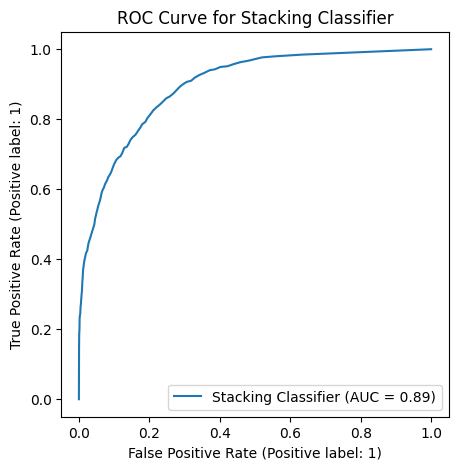

In [ ]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(5, 5))
RocCurveDisplay.from_estimator(stacking_clf, processed_X_test, y_test, ax=ax, name='Stacking Classifier')
plt.title('ROC Curve for Stacking Classifier')
plt.show()

The stacking model has an AUC of 0.89. This indicates a highly performing model with strong discriminative power. This high AUC indicates that the model can effectively distinguish between positive and negative instances. The model is likely to be reliable and robust. It may perform well across various thresholds, making it valuable for practical applications.

###iii. Precision-Recall Curve

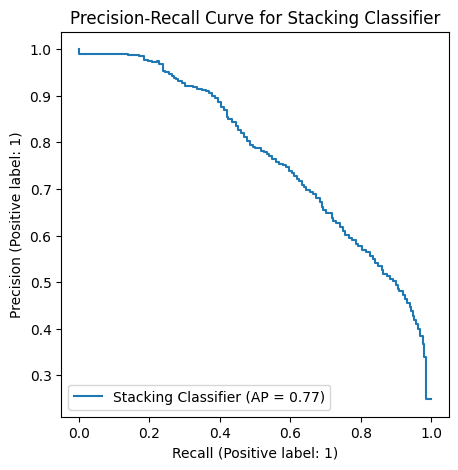

In [ ]:
#Plot the precision recall curve
from sklearn.metrics import PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(5, 5))
PrecisionRecallDisplay.from_estimator(stacking_clf, processed_X_test, y_test, ax=ax, name='Stacking Classifier')
plt.title('Precision-Recall Curve for Stacking Classifier')
plt.show()

The precision recall curve shows an AP of 0.77. It is considered good and indicates a reasonable trade-off between precision and recall. Precision measures the accuracy of positive predictions, while recall measures the ability to capture all positive instances. Our AP suggests that the model maintains good precision even as it increases recall.

#VI. Feature Importance

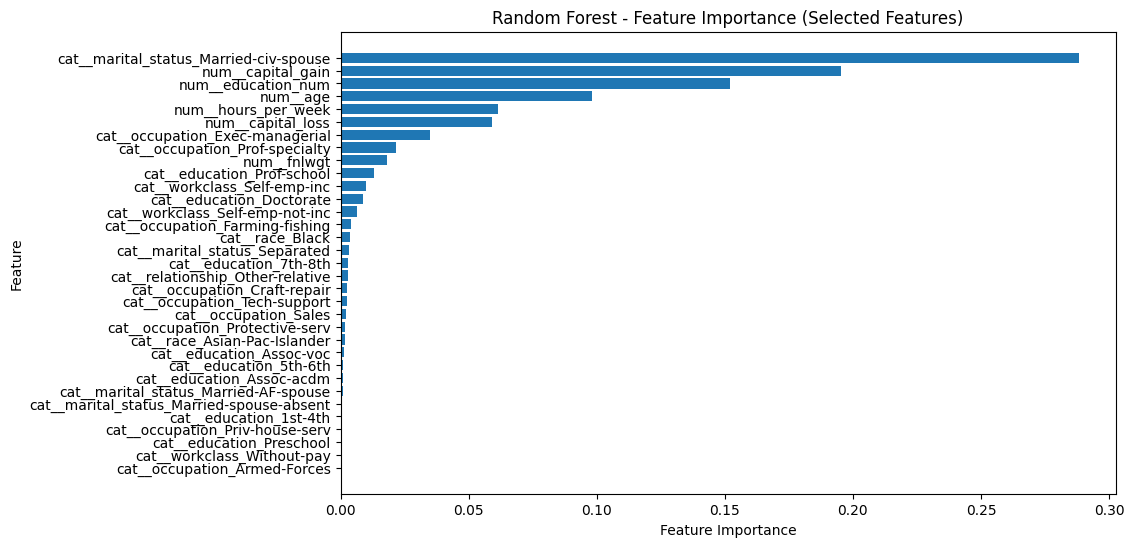

In [ ]:
import matplotlib.pyplot as plt

# Assuming final_model_rf is a scikit-learn RandomForestClassifier
feature_importances = final_model_rf.feature_importances_

# Get indices to sort feature importances in ascending order
sorted_idx = feature_importances.argsort()

# Sort feature names and importances accordingly
sorted_feature_names = [selected_feature_names[i] for i in sorted_idx]
sorted_feature_importances = feature_importances[sorted_idx]

# Create a bar plot for sorted feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances)
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importance (Selected Features)')
plt.show()


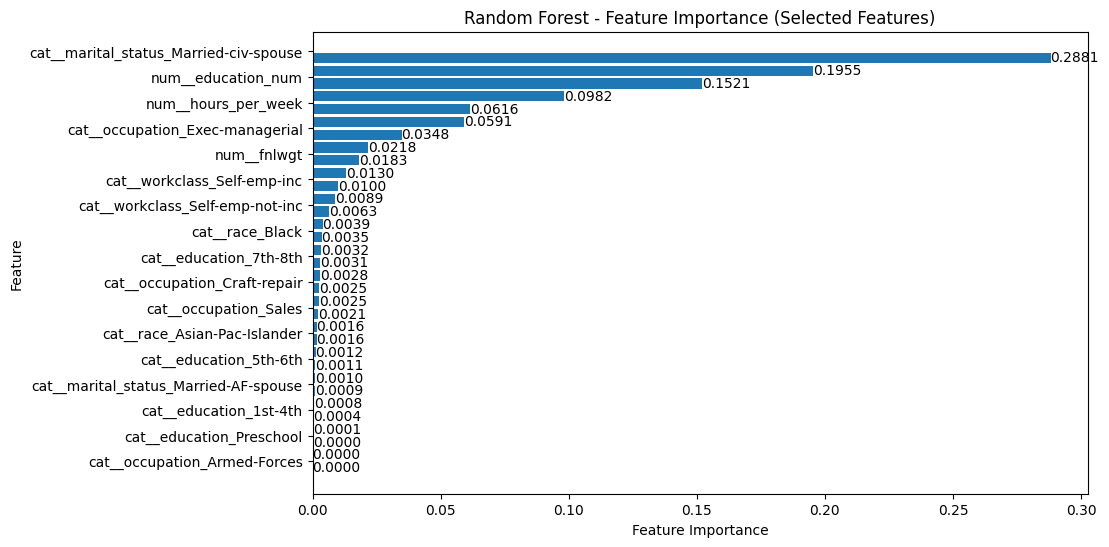

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming final_model_rf is a scikit-learn RandomForestClassifier
feature_importances = final_model_rf.feature_importances_

# Get indices to sort features and importances
sorted_indices = np.argsort(feature_importances)
sorted_feature_names = [selected_feature_names[i] for i in sorted_indices]
sorted_importances = [feature_importances[i] for i in sorted_indices]

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(sorted_feature_names)), sorted_importances)

# Adjust spacing between y ticks
plt.yticks([])  # Disable default y ticks

# Increase spacing between y ticks
tick_positions = np.arange(0.5, len(sorted_feature_names) + 0.5, 2)
plt.yticks(tick_positions, sorted_feature_names[::2])  # Adjust spacing as needed

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest - Feature Importance (Selected Features)')

# Add annotations for each bar
for bar, importance in zip(bars, sorted_importances):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{importance:.4f}', ha='left', va='center')

plt.show()


For our final visualization, we decided to visualize the importance of our features. Our top 5 features were being married to a civilian, years of education, the hours worked per week, being an exceutive or manager, the the weights that were set to generalize the census results, and being self employed.  

#VII. Challenges
- **Runtime Issues**: Addressed prolonged runtimes from large datasets and complex models affecting experimentation and tuning.

- **Feature Importance and Selection**: Overcame challenges in discerning key features from 60+ variables using correlation and importance ranking.

- **Ensemble Model Voting Decisions**: Resolved the dilemma of choosing voting strategies in ensemble models to improve accuracy and effectiveness.

- **Python Version Compatibility**: Managed Python version compatibility issues to ensure smooth code execution.

- **Platform Selection - Jupyter vs. Colab**: Chose Google Cloud Console for efficiency over Jupyter and Colab, due to dataset size.

- **Managing Coding Dependencies**: Ensured library compatibility and consistent package installation in a collaborative environment.

- **Hyperparameter Tuning Complexity**: Utilized various tuning methods to optimize model performance, balancing computational load.

#VIII. Conclusion

Our investigation into predicting income levels utilizing the adult census dataset has yielded compelling insights. The stacking classifier demonstrated its robustness, outperforming individual models like the logit and knn with an accuracy of 84.83%. Notably, the random forest model emerged as the most accurate, achieving an impressive 85.48%, closely followed by the svc at 84.44%.

In evaluating balanced accuracy, which accounts for class imbalance, the stacking classifier again proved effective, surpassing the voting algorithm and the random forest with a balanced accuracy of 75.12% on the test set.

Ranking the models by their accuracy on the test set places the random forest at the pinnacle, followed by the voting classifier, stacking classifier, svc, logit, and knn. This suggests that while the stacking classifier is highly accurate, the logit model leads in terms of balanced accuracy, indicating its potential utility in applications requiring sensitivity to class proportions.

The high accuracy of the stacking classifier prompted further analysis through additional metrics and visualizations. This approach underscores our commitment to developing a nuanced understanding of income prediction, which is critical for informed policymaking and socio-economic analysis.

Moving forward, our findings have the potential to inform a variety of applications, from government policy to individual economic strategy, underscoring the value of machine learning in socio-economic research.

# IX. References
- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media.
-James, G., Witten, D., Hastie, T., & Tibshirani, R. (2017). An Introduction to Statistical Learning: with Applications in Python (Springer Texts in Statistics). Springer.
- OpenAI - ChatGPT
- https://www.kaggle.com/datasets/uciml/adult-census-income?select=adult.csvc